In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../scripts')))

In [4]:
from utils import *

In [5]:
df = pd.read_csv('../../data/Ecommerce Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
summary = column_summary(df)
display(summary)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Email,object,0,500,500,"{'mstephenson@fernandez.com': 1, 'elizabeth61@..."
1,Address,object,0,500,500,"{'835 Frank Tunnel Wrightmouth, MI 82180-9605'..."
2,Avatar,object,0,500,138,"{'SlateBlue': 7, 'Cyan': 7, 'CadetBlue': 7, 'G..."
3,Avg. Session Length,float64,0,500,500,"{34.49726772511229: 1, 32.837893053239185: 1, ..."
4,Time on App,float64,0,500,500,"{12.655651149166752: 1, 13.185181167368498: 1,..."
5,Time on Website,float64,0,500,500,"{39.57766801952616: 1, 35.92159518889928: 1, 3..."
6,Length of Membership,float64,0,500,500,"{4.082620632952961: 1, 1.823595182991803: 1, 3..."
7,Yearly Amount Spent,float64,0,500,500,"{587.9510539684005: 1, 445.0621855089249: 1, 4..."


## NO null Values

# Visualizations

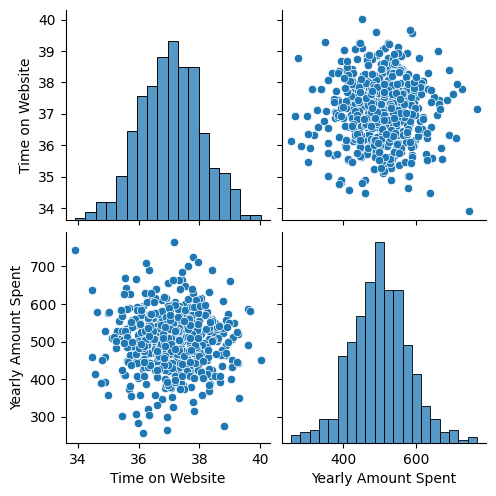

In [17]:
sns.pairplot(df, vars=['Time on Website', 'Yearly Amount Spent'], kind='scatter')
plt.show()

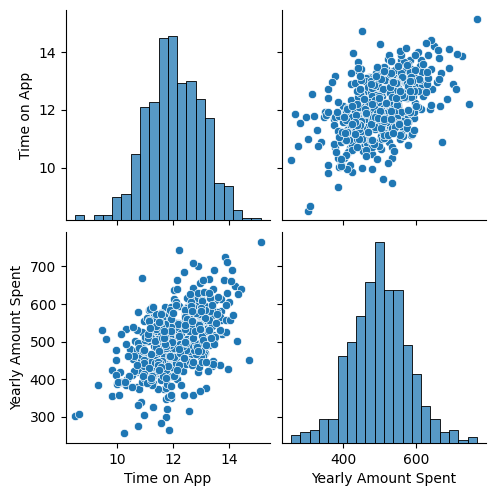

In [18]:
sns.pairplot(df, vars=['Time on App', 'Yearly Amount Spent'], kind='scatter')

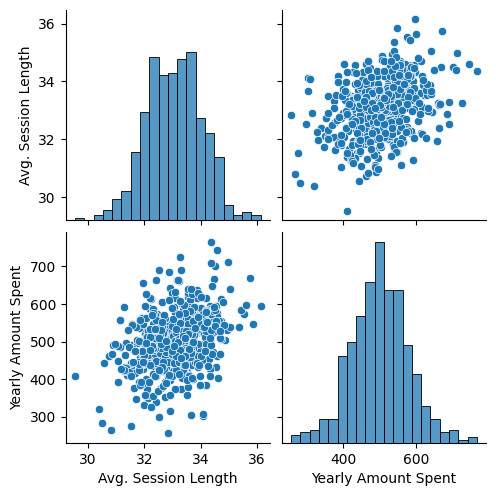

In [19]:
sns.pairplot(df, vars=['Avg. Session Length', 'Yearly Amount Spent'], kind='scatter')

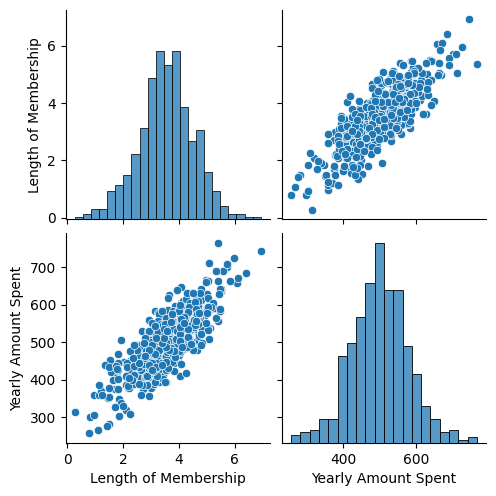

In [20]:
sns.pairplot(df, vars=['Length of Membership', 'Yearly Amount Spent'], kind='scatter')

### Length of membership seems to have a strong correlation with Yearly Amount Spent

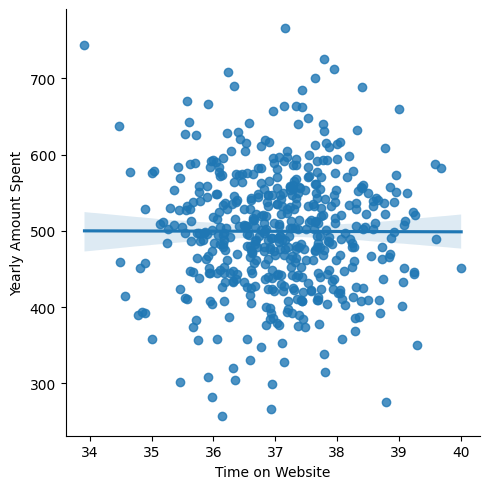

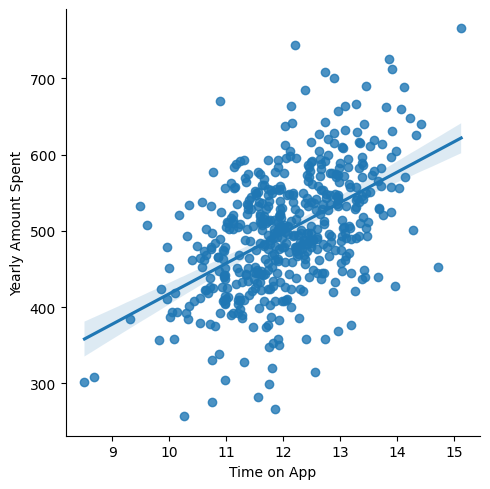

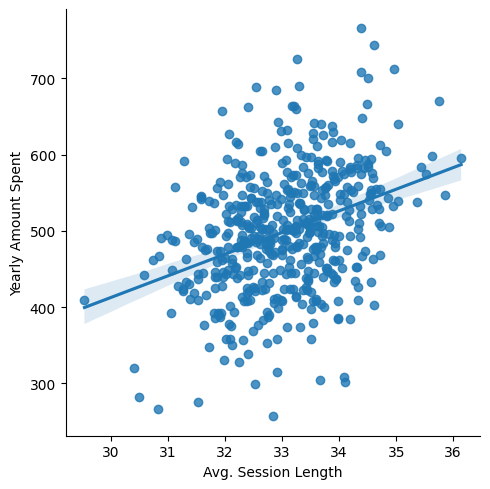

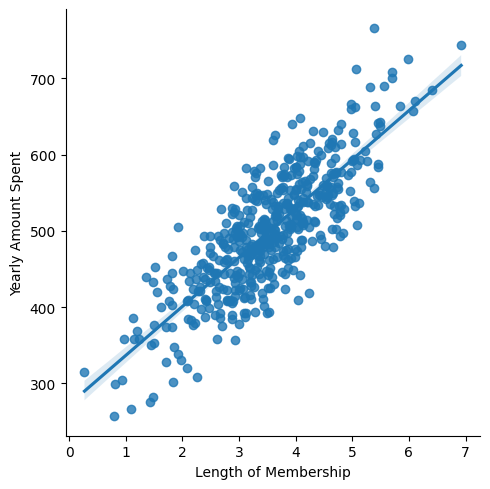

In [21]:
independent_variables = ['Time on Website', 'Time on App', 'Avg. Session Length', 'Length of Membership']
dependent_variable = 'Yearly Amount Spent'
for var in independent_variables:
    sns.lmplot(x=var, y=dependent_variable, data=df)
    plt.show()

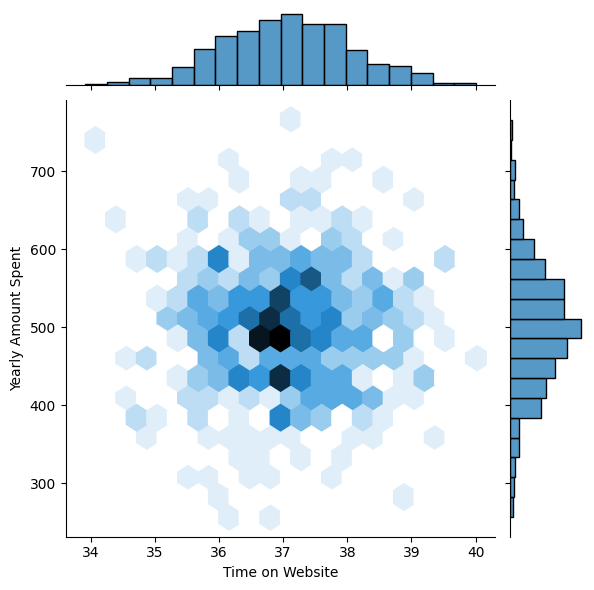

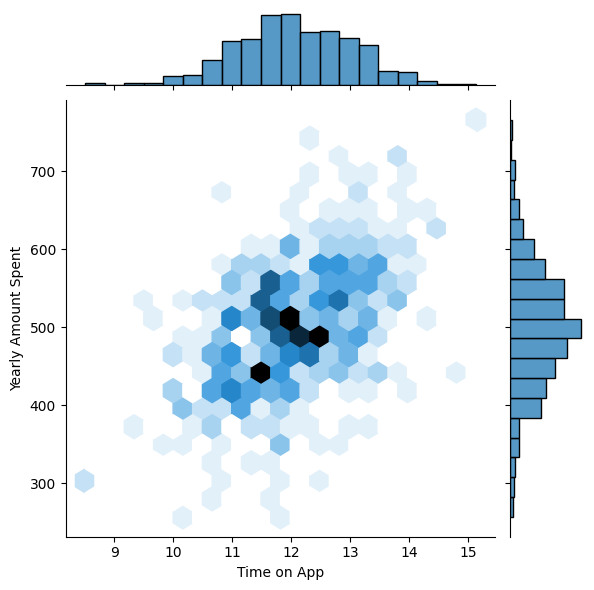

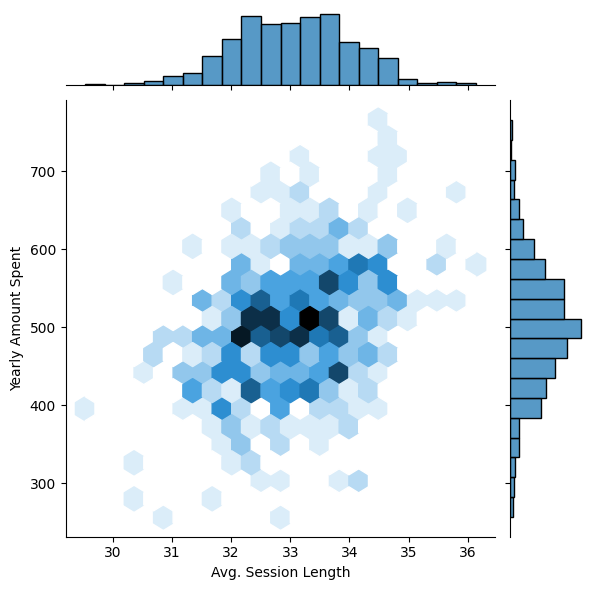

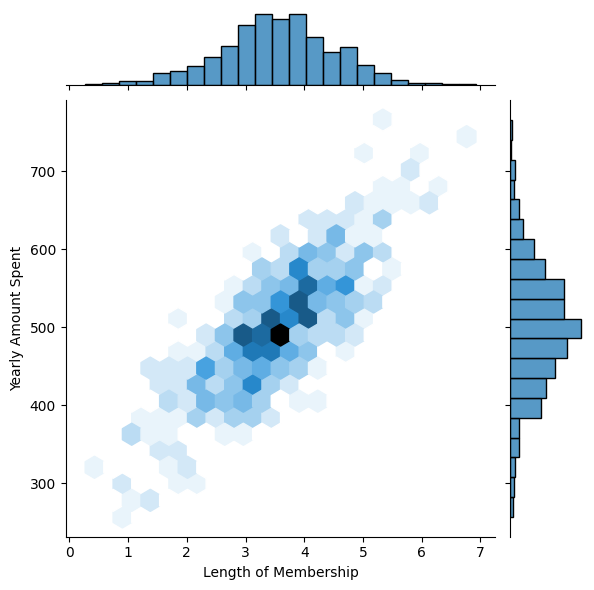

In [22]:
for var in independent_variables:
    sns.jointplot(x=var, y=dependent_variable, data=df, kind='hex')
    plt.show()

In [23]:
for var in independent_variables:
    print(f'Correlation between {var} and {dependent_variable}: {np.corrcoef(df[var], df[dependent_variable])[0, 1]}')

Correlation between Time on Website and Yearly Amount Spent: -0.0026408446721589386
Correlation between Time on App and Yearly Amount Spent: 0.49932777005345047
Correlation between Avg. Session Length and Yearly Amount Spent: 0.35508829470764314
Correlation between Length of Membership and Yearly Amount Spent: 0.8090835682475811


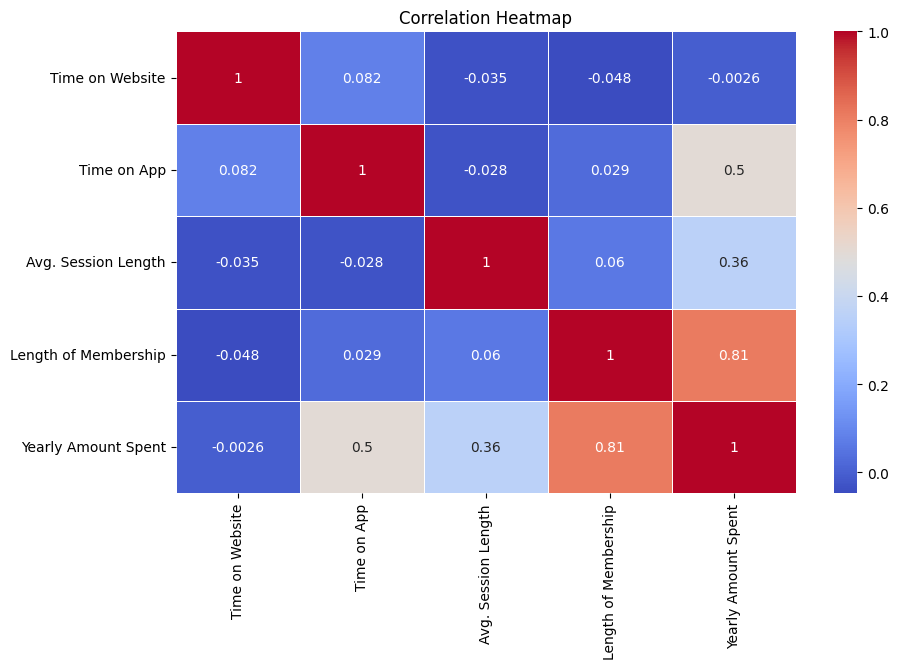

In [25]:
# Calculate the correlation matrix
correlation_matrix = df[independent_variables + [dependent_variable]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()